In [106]:
import pandas as pd
from fbprophet import Prophet

import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline 

In [3]:
df = pd.read_csv('./data/alldata.csv')

In [85]:
df_mass = df[(df['Stname']=='Massachusetts') & (df['YR']<2014)].groupby('YR').Cases.sum().reset_index()

In [86]:
## cluster based on forest data, rural vs urban data, and latitude into N similar groups to increase significance -- how did we get the number of clusters? 
## -- whats the physical reason behind the preiodicity? 
# and to deal with missing data 
# scale and normalize all of them by the value in 2000 - check whether to do this before or after the clustering 
# check whether this relates to populations, rural or urban areas, or census population  
# Once we have the clusters, normalize and fit and test 

In [87]:
df_mass.columns = ['ds', 'y']
df_mass.ds = pd.to_datetime((df_mass.ds),format='%Y')

In [113]:
len(df_mass)

14

In [114]:
m = Prophet(n_changepoints=2, yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
m.add_seasonality(name='yearly2', period=1400, fourier_order=1)
m.add_regressor(name = column)
m.fit(df_mass)

future = m.make_future_dataframe(periods=25, freq='m')
fcst = m.predict(future)
fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


/Users/avani/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:188: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/Users/avani/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:201: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



TypeError: unhashable type: 'numpy.ndarray'

In [104]:
df.columns

Index(['FIPS', 'Ctyname', 'Stname', 'STCODE', 'CTYCODE', 'Cases', 'CENSUSAREA',
       'geometry', 'long_lat', 'ST', 'DIV', 'EL_x', 'YR', 'JAN_PCPN',
       'FEB_PCPN', 'MAR_PCPN', 'APR_PCPN', 'MAY_PCPN', 'JUN_PCPN', 'JUL_PCPN',
       'AUG_PCPN', 'SEP_PCPN', 'OCT_PCPN', 'NOV_PCPN', 'DEC_PCPN', 'EL_y',
       'JAN_TMPC', 'FEB_TMPC', 'MAR_TMPC', 'APR_TMPC', 'MAY_TMPC', 'JUN_TMPC',
       'JUL_TMPC', 'AUG_TMPC', 'SEP_TMPC', 'OCT_TMPC', 'NOV_TMPC', 'DEC_TMPC',
       'JAN_TMIN', 'FEB_TMIN', 'MAR_TMIN', 'APR_TMIN', 'MAY_TMIN', 'JUN_TMIN',
       'JUL_TMIN', 'AUG_TMIN', 'SEP_TMIN', 'OCT_TMIN', 'NOV_TMIN', 'DEC_TMIN',
       'JAN_TMAX', 'FEB_TMAX', 'MAR_TMAX', 'APR_TMAX', 'MAY_TMAX', 'JUN_TMAX',
       'JUL_TMAX', 'AUG_TMAX', 'SEP_TMAX', 'OCT_TMAX', 'NOV_TMAX', 'DEC_TMAX',
       'ST_new', 'year', 'State FIPS Code', 'County FIPS Code',
       'Forest & Woodland', 'Shrub & Herb Vegetation', 'Desert & Semi-Desert',
       'Polar & High Montane Scrub, Grassland & Barrens', 'Aquatic Vegetation',

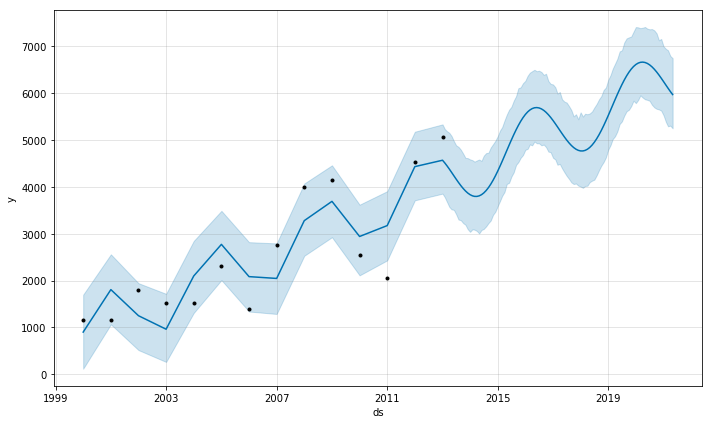

In [90]:
fig = m.plot(fcst)

In [91]:
df[(df['Stname']=='Massachusetts') & (df['YR']>=2014)].groupby('YR').Cases.sum().reset_index()

,YR,Cases
0,2014.0,5096
1,2015.0,4082
2,2016.0,198
3,2017.0,405


In [ ]:
# cluster, mean, and fit, and validate. 

In [ ]:
fig1 = m.plot(forecast)

In [108]:
column = np.linspace(1,20,1)

Exception: Regressors must be added prior to model fitting.

In [83]:
help(Prophet.add_regressor)

Help on function add_regressor in module fbprophet.forecaster:

add_regressor(self, name, prior_scale=None, standardize='auto', mode=None)
    Add an additional regressor to be used for fitting and predicting.
    
    The dataframe passed to `fit` and `predict` will have a column with the
    specified name to be used as a regressor. When standardize='auto', the
    regressor will be standardized unless it is binary. The regression
    coefficient is given a prior with the specified scale parameter.
    Decreasing the prior scale will add additional regularization. If no
    prior scale is provided, self.holidays_prior_scale will be used.
    Mode can be specified as either 'additive' or 'multiplicative'. If not
    specified, self.seasonality_mode will be used. 'additive' means the
    effect of the regressor will be added to the trend, 'multiplicative'
    means it will multiply the trend.
    
    Parameters
    ----------
    name: string name of the regressor.
    prior_scale: op